# 3. 머신러닝 프로젝트 진행과정

---

## 학습 목표
- 머신러닝 프로젝트 수행하기 위해서 그 진행 과정을 학습합니다.
- 머신러닝 모델 선택에 앞서 데이터를 분석하고 정제하는 방법을 학습합니다.

---

## 목차

### 2. 탐색적 데이터 분석
1. 데이터 확인
2. 데이터 정제
3. 특성 엔지니어링
4. 상관 관계 분석


---

## 2. 탐색적 데이터 분석

### 2-0. 탐색적 데이터 분석 과정이란

탐색적 자료 분석 과정은 미국의 튜키 박사에 의해 창안되었고, 가설검증이나 모형을 적용하기 전에 데이터가 가진 정보를 사람에게 전달하도록 만드는 방법입니다.

탐색적 데이터 분석의 목적은 데이터를 이해하는 것입니다. 

데이터를 이해하기 위해서 적절한 모형, 시각화 산출물을 사용하여 다양한 방식으로 데이터를 표현하고,표현된 데이터를 바탕으로 데이터 간의 상관 관계를 분석합니다.

또한 탐색적 데이터 분석은 완전하지 않은 데이터를 정제하여 생략되어 있는 데이터나, 분석에 필요 없는 중복 데이터 등을 처리하는 과정을 수행합니다.

탐색적 데이터 분석 과정을 정리하면 아래와 같습니다.

- 데이터 확인
- 데이터 정제
- 특성 엔지니어링
- 상관 관계 분석

### 2-1. 데이터 확인

분석하고자 하는 데이터 셋과 이해하기 위한 단계로 데이터 셋에 대해 아래 두 가지 확인 과정을 거치게 됩니다.

1. 변수 확인
2. Raw 데이터 확인

#### 변수 확인

변수 확인 단계에서는 데이터를 구성하고 있는 변수는 무엇이 있는지, 그리고 그 변수의 자료형과 의미하는 바를 파악하는 것을 확인합니다.

변수 확인 과정을 수행하기 위해서 kaggle의 유명한 분석용 데이터인 타이타닉 데이터를 사용해 봅시다.

In [1]:
import pandas as pd

titanic = pd.read_csv('./train.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


5개의 데이터를 출력하여 12개의 변수를 갖고 있음을 알 수 있었습니다.

각 변수들은 아래와 같습니다.

|변수|의미 |
|:---|:---|
|PassengerId | 승객 아이디 번호|
|Survived | 생존 여부, 죽음 -> 0, 생존 -> 1|
|Pclass |  티켓 클래스, 1 = 1st, 2 = 2nd, 3 = 3rd|
|Name | 이름|
|Sex | 성별 |
|Age | 나이|
| SibSp | 함께 탑승한 형제 또는 배우자 수|
|Parch | 함께 탑승한 부모 또는 자녀 수|
| Ticket| 티켓 번호|
| Fare | 요금 정보|
| Cabin | 선실 번호|
| Embarked | 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown|

다음은 `.info()` 함수를 사용하여 각 변수에 어떤 형태의 데이터들이 존재하고 변수들의 개수를 확인해 봅시다.

In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic.shape

(891, 12)

위 정보를 보게 되면 각 변수 별로 어떤 데이터 형들이 사용되었고, 총 몇 개의 데이터가 존재하는지 알 수 있습니다.

예를 들어, PassengerId 변수에는 int64 자료형의 데이터가 891개 존재하고 `Age`, `Cabin`, `Embarked`에 누락된 데이터가 있는 것을 확인할 수 있습니다.

이렇게 어떤 변수들이 존재하고 데이터가 의미하는 것을 파악하는 단계까지를 변수 확인 단계라 할 수 있습니다.

#### Raw 데이터 확인

변수 확인을 통하여 어떤 변수가 있는지 파악했다면, 변수 하나에 대해 `1장 머신러닝을 위한 라이브러리`에서 배웠던 matplotlib, seaborn 등에서 제공하는 histogram이나 boxplot을 사용해서 평균, 최빈값, 중간값 등과 함께 각 변수들의 분포를 확인합니다. 이러한 과정을 **Raw 데이터 확인**이라 부르며 이를 통하여 각 데이터의 통계적 특성을 확인할 수 있습니다.

**boxplot**

boxplot 함수는 데이터의 분포를 박스 형태로 나타내어 표시합니다.

백분위 기준 25% 위치를 박스 하단, 75% 위치를 박스 상단으로 한 박스를 그리고 가운데 초록색 선으로 중간값을 표시합니다.

타이타닉 데이터의 `age` 변수에 대해서 boxplot을 그려 데이터의 분포를 확인해보겠습니다. 

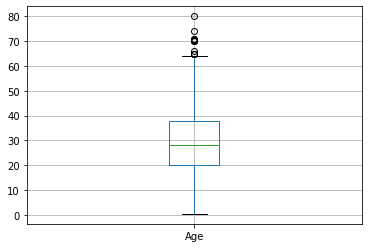

In [4]:
boxplot = titanic.boxplot(column = ['Age'])

위 그래프를 보면 파란 박스는 20세 ~ 39세 그려지고 중간 값인 초록 선은 29세에 그려져 있습니다.

박스 위아래로 0세와 약 64세에 그려져 있는검은 선은 데이터의 최댓값, 최솟값을 의미하며, 검은 선 외곽에 존재하는 동그라미로 표현된 포인트들은 이상치(outlier)에 속하는 값들입니다.

이상치를 판단하는 기준은 뒤에 나오는 `이상치 처리` 에서 자세히 설면하도록 하겠습니다.

이렇게 boxplot은 박스 형태로 데이터의 분포를 나누기 때문에 이산형 데이터의 경우에는 중요 정보를 얻을 수 없습니다.

이산형 데이터란 문자와 같이 별개의 요소로 구성되거나, 정수와 같이 하나 이상의 셀수 있는 값으로 표현되는 데이터를 의미합니다.

0과 1 값만 갖는 이산형 데이터 `Survived`에 대한 boxplot을 그리면 다음과 같습니다.

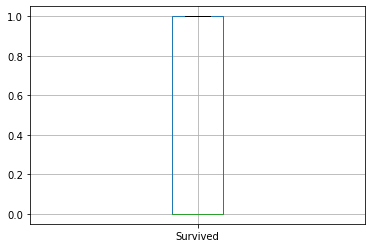

In [5]:
boxplot = titanic.boxplot(column = ['Survived'])

위 그래프가 보여주듯이 `Survived` 변수는 0 또는 1의 값만 가지고 있기에 별다른 정보를 얻을 수가 없습니다.

따라서 `Age`와 같이 연속형 데이터를 갖는 변수에 대해서만 boxplot은 유의미한 정보를 표현할 수 있습니다.

연속형 데이터는 이산형 데이터의 반대되는 개념으로 셀수 없는 수치를 갖는 데이터를 의미합니다.

나머지 연속형 데이터인 `Fare`에 대해서도 boxplot 그래프를 출력해봅시다.

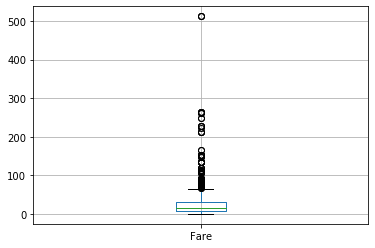

In [6]:
boxplot = titanic.boxplot(column = ['Fare'])

`Fare` 변수의 최솟값과 최댓값 구간의 크기가 매우 작게 표시된걸로 보아 이상치 값들이 매우 넓게 분포하고 있음을 알 수 있습니다. 

**histogram**

다음으로 histogram의 경우, 이산형 데이터의 분포를 나타내기 좋습니다.

`Survived` 데이터를 histogram으로 표현하면 다음과 같습니다.

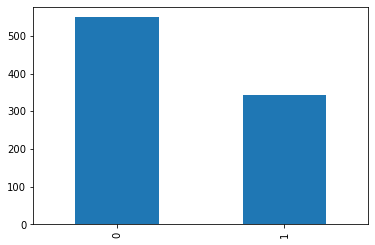

In [7]:
titanic['Survived'].value_counts().plot(kind='bar')

위 결과로 타이타닉에서 사망한 사람이 생존한 사람보다 많았다는 것을 확인할 수 있습니다. 

같은 방식으로 다른 이산형 데이터들도 출력해 봅시다.

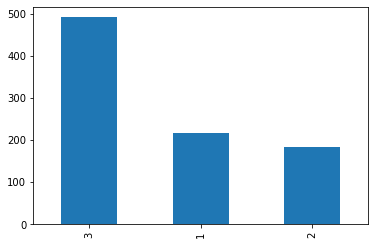

In [8]:
titanic['Pclass'].value_counts().plot(kind='bar')

`Pclass`의 경우에는 3번 티켓을 선택한 사람이 많았습니다.

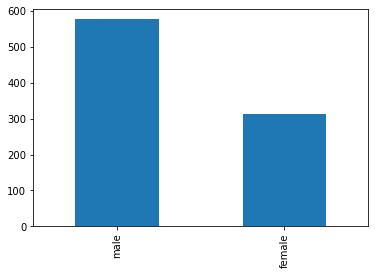

In [9]:
titanic['Sex'].value_counts().plot(kind='bar')

타이타닉에 탑승한 남여 비율은 대략 2:1로 보여집니다.

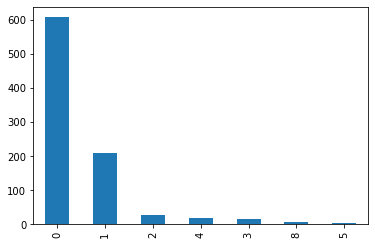

In [10]:
titanic['SibSp'].value_counts().plot(kind='bar')

탑승객 중 미혼인 경우가 대부분이였고, 미혼의 30%만큼의 부부가 있었습니다.

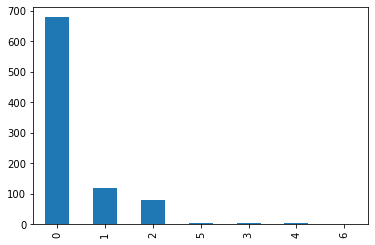

In [11]:
titanic['Parch'].value_counts().plot(kind='bar')

자녀나 부모가 없는 경우가 많았으며, 그 수의 약 20%정도가 자녀나 부모를 동반한 승객이었습니다.

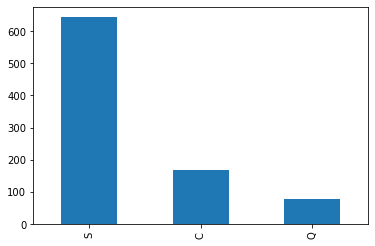

In [12]:
titanic['Embarked'].value_counts().plot(kind='bar')

`Age`에 대해서도 `value_counts().plot` 함수를 사용하여 histogram을 그릴 수 있지만 각 나이 값들을 x축에 표현해야하기에 아래처럼 다소 복잡한 그래프가 그려집니다.

따라서, matplotlib의 hist함수를 사용하여 각 나이 값들을 범주로 묶어 출력합니다.

예를 들어, 0 ~ 10세, 10 ~ 20세, ..., 80 ~ 90세 이런식으로 범주를 나누고 범주에 해당되는 값들을 histogram으로 표현하게 됩니다. 

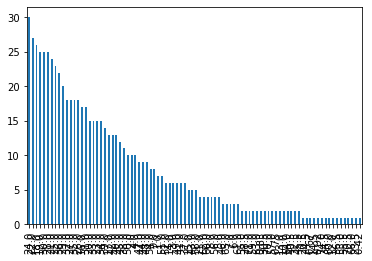

In [13]:
titanic['Age'].value_counts().plot(kind='bar')

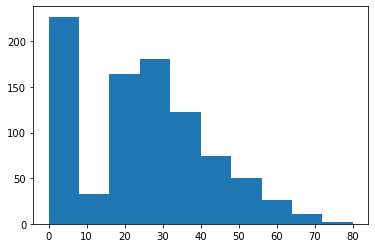

In [14]:
from matplotlib import pyplot as plt

titanic['Age'] = titanic['Age'].fillna(0)

plt.hist(titanic['Age'], bins = 10)
plt.show()

이렇게 **Raw 데이터 확인**을 통하여 각 데이터들의 분포를 확인할 수 있었습니다.

이러한 데이터 분포에 대한 정보는 데이터 간의 상관 관계를 분석할 때 중요한 척도로 사용됩니다.

---